In [5]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')

import matplotlib.pyplot as plt

In [4]:
seed = 7
np.random.seed(seed)

In [35]:
# load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

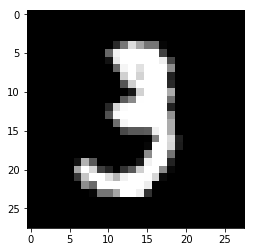

In [36]:
plt.imshow(X_train[10], cmap=plt.get_cmap('gray'))
plt.show()

In [37]:
# flatten the images to a vector
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [38]:
# normalize the input values
X_train = X_train / 255
X_test = X_test / 255

In [39]:
# one hot encode the output values
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [41]:
num_classes = y_train.shape[1]

In [46]:
def cnn():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [47]:
# build the model
model = cnn()

In [53]:
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 67s - loss: 0.0034 - acc: 0.9989 - val_loss: 0.0405 - val_acc: 0.9898
Epoch 2/10
 - 66s - loss: 0.0029 - acc: 0.9991 - val_loss: 0.0403 - val_acc: 0.9906
Epoch 3/10
 - 66s - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0507 - val_acc: 0.9888
Epoch 4/10
 - 66s - loss: 0.0040 - acc: 0.9987 - val_loss: 0.0391 - val_acc: 0.9908
Epoch 5/10
 - 66s - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0437 - val_acc: 0.9897
Epoch 6/10
 - 66s - loss: 0.0023 - acc: 0.9994 - val_loss: 0.0433 - val_acc: 0.9900
Epoch 7/10
 - 66s - loss: 0.0028 - acc: 0.9991 - val_loss: 0.0460 - val_acc: 0.9902
Epoch 8/10
 - 66s - loss: 0.0021 - acc: 0.9994 - val_loss: 0.0491 - val_acc: 0.9902
Epoch 9/10
 - 66s - loss: 0.0015 - acc: 0.9996 - val_loss: 0.0470 - val_acc: 0.9903
Epoch 10/10
 - 66s - loss: 0.0018 - acc: 0.9995 - val_loss: 0.0428 - val_acc: 0.9905


In [1]:
# evaluate the CNN model
scores = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy = %.2f%%" % (scores[1] * 100))

NameError: name 'model' is not defined